<a href="https://colab.research.google.com/github/larissa-rangel/MO443-processamento-de-imagem-digital/blob/main/MO443_T1_Q8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.8 Filtragem de Imagens

Fontes: https://viceri.com.br/insights/entendendo-de-vez-a-convolucao-base-para-processamento-de-imagens/#:~:text=Mas%20afinal%20que%20%C3%A9%20convolu%C3%A7%C3%A3o,do%20deslocamento%20existente%20entre%20elas.

https://www.analyticsvidhya.com/blog/2021/08/implementing-convolution-as-an-image-filter-using-opencv/

https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381

https://numpy.org/doc/stable/reference/generated/numpy.pad.html

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
#Importando todas as bibliotecas necessárias
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy import signal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def convolution (X,h):  #função de convolução
  Y = np.zeros(A.shape) #inicializa a matriz de saída com zeros
  padding = int(np.trunc(len(h)/2))  #cria um padding de tamanho do filtro/2, com resultado truncado, que irá me dizer quantas linhas e colunas da matriz de entrada precisa copiar para fora
  B = np.pad(A,padding,'symmetric') # esta função preenche uma matriz, de acordo com a larguras de pad e tipo de preenchimento que foi escolhido 'symetric' para espelhar os valores para fora da matriz
  for i in range(A.shape[0]):
      for j in range(A.shape[1]): #laço para percorrer a matriz e fazer a convolução com o filtro
          element = 0 #o elemento a ser substituído começa com zero
          for ki in range(len(h)): #laço para percorre pelos termos do kernel e fazer o cálculo do somatório
            for kj in range(len(h)):
                element += B[i-padding+ki][j-padding+kj] * h[ki][kj] #acumula o valor do elemento

          Y[i,j] = element #salva na matriz Y
  return Y #retorna a matriz convoulída

(512, 512) uint8
230 0


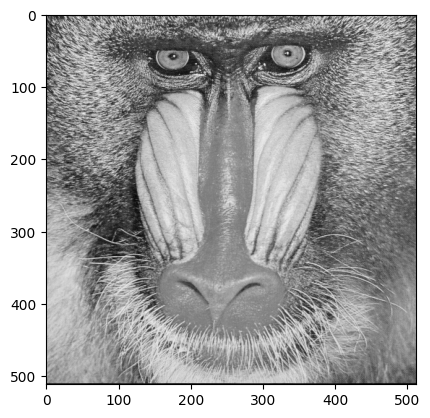

In [ ]:
A = io.imread('/content/drive/MyDrive/Testes/baboon.png')#Carregando a imagem da pasta no drive e armazenando em uma matriz np.array
print(A.shape, A.dtype)#Imprimir as dimensões da matriz que contém os dados da imagem
print(A.max(),A.min()) #Imprimir o valor máximo e mínimo da matriz que contém os dados da imagem
plt.imshow(A,cmap='gray')#Exibir os dados da matriz como uma imagem em  RGB
plt.show()#Exibir a figura aberta

In [ ]:
#Filtros
h1 = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
h2 = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256
h3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h4 = np.rot90(np.rot90(np.rot90(h3)))
h5 = -np.ones((3,3))
h5[1,1] = 8
h6 = np.ones((3,3))/9
h7 = -np.ones((3,3))
np.fill_diagonal(np.fliplr(h7),2)
h8 = np.fliplr(h7)
h9 = np.zeros((9,9))
np.fill_diagonal(h9,1/9)
h10 = (np.array([[-1,-1,-1,-1,-1], [-1,2,2,2,-1], [-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]]))/8
h11 = -np.ones((3,3))
np.fill_diagonal(np.fliplr(h11),0)
h11[2,1] =h11[1,2]=h11[2,2]=1


(516, 516)
(512, 512) float64
1941.0 -1500.0
(516, 516)
(512, 512) float64
209.7109375 11.8984375
(514, 514)
(512, 512) float64
625.0 -663.0
(514, 514)
(512, 512) float64
804.0 -772.0
(514, 514)
(512, 512) float64
977.0 -814.0
(514, 514)
(512, 512) float64
210.22222222222223 10.666666666666664
(514, 514)
(512, 512) float64
467.0 -492.0
(514, 514)
(512, 512) float64
466.0 -550.0
(520, 520)
(512, 512) float64
206.0 16.333333333333332
(516, 516)
(512, 512) float64
457.125 -148.75
(514, 514)
(512, 512) float64
495.0 -469.0


<function matplotlib.pyplot.show(close=None, block=None)>

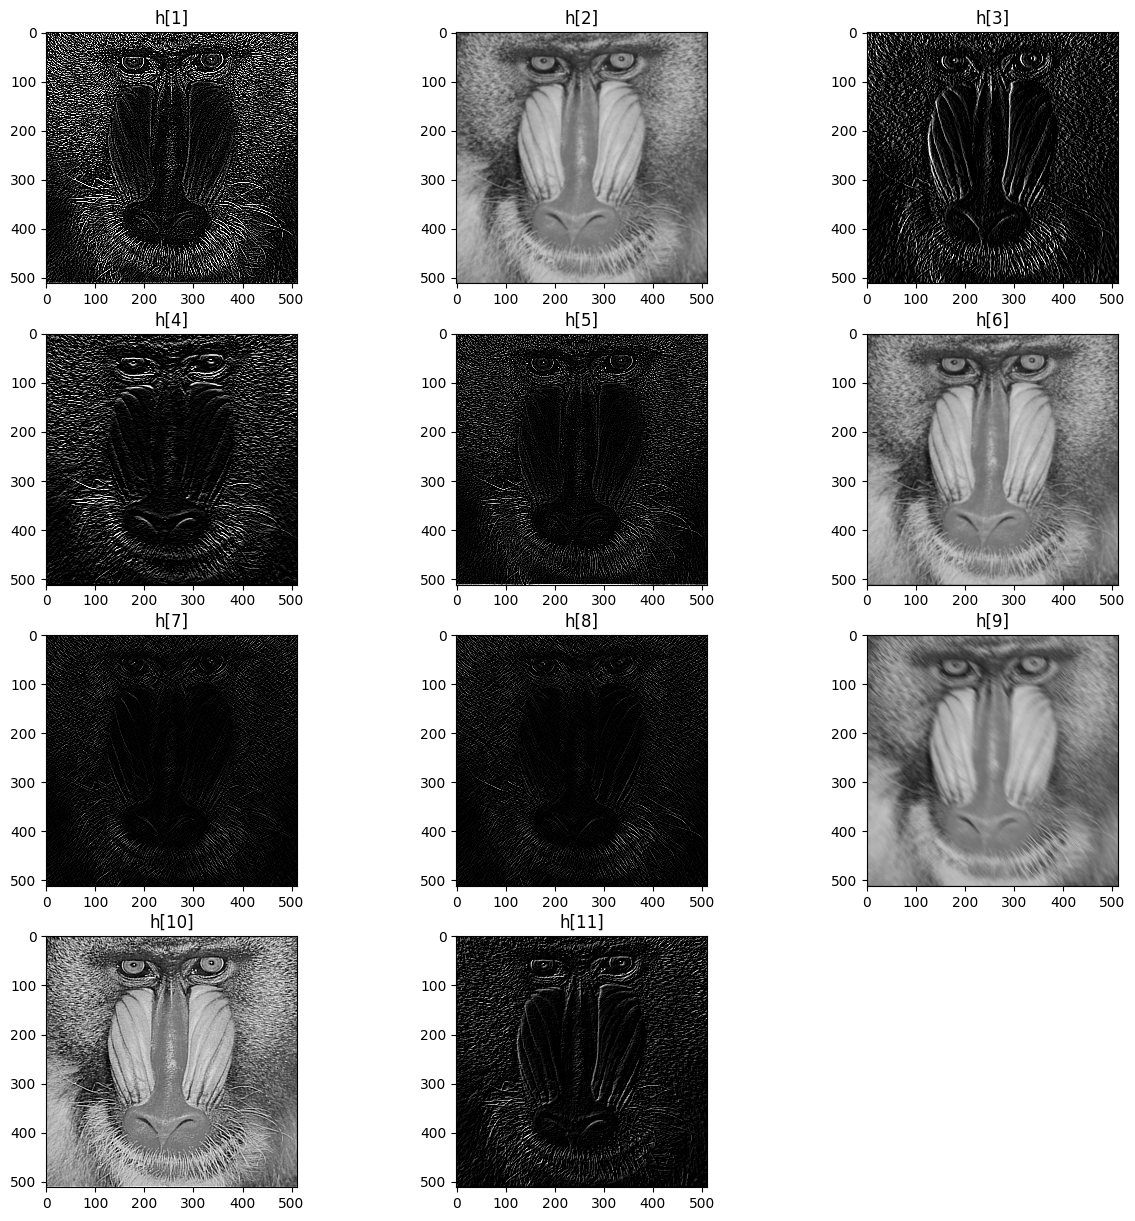

In [ ]:
Y = np.zeros(A.shape, dtype='uint8') #matriz de saída com o resultado da convolução
h = [h1,h2,h3,h4,h5,h6,h7,h8,h9, h10, h11] #lista com os filtros
fig = plt.figure(figsize=(15,15))#cria uma figura de tamanho (15,15)
rows = 4#linhas
columns = 3 #colunas
for i in range(len(h)): #irá fazer a convolução de cada filtro de uma só vez
  Y = convolution(A,h[i]) #chama a função convolution e passa como parâmetro a matriz de entrada e o filtro e retorna a matriz convoluída
  fig.add_subplot(rows, columns, i+1)#vai adicionando as imagens em cada grade da figura
  #print(Y.shape, Y.dtype) # as imagens foram armazenadas sem forçar o astype np.uint8 pois apenas com 8 bits não foi possível mostrar os detalhes do efeitos
  #print(Y.max(),Y.min())
  plt.title('h'+str([i+1]))
  plt.imshow(Y,cmap='gray', vmin=0, vmax=255)#exibir a figura

plt.show

(514, 514)
(514, 514)
(512, 512) float64
807.970296483726 0.0


<function matplotlib.pyplot.show(close=None, block=None)>

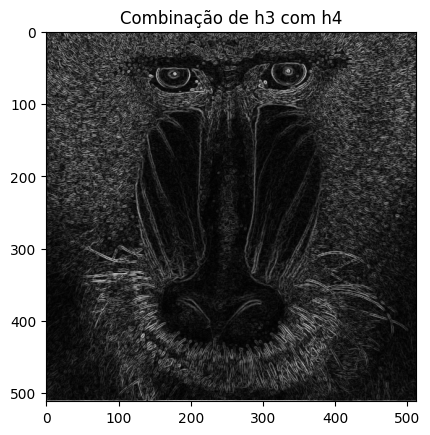

In [ ]:
Y = (np.sqrt((convolution(A,h3)**2)+(convolution(A,h4)**2))) #Realiza a combinação dos h3 e h4 conforme a equação especificada
#print(Y.shape, Y.dtype) #verificar a dimensão e o tipo
#print(Y.max(),Y.min()) #verificar os valores máximo e mínimo
plt.title('Combinação de h3 com h4')
plt.imshow(Y,cmap='gray')#exibir a figura  em cinza
plt.show#exibir a figura